In [287]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [288]:
df = pd.read_csv('car evaluation.csv')
df.head()


#class\t - accetable or unacceptable 

,buying,maint,doors,persons,lug_boot,safety,class\t
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [289]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class\t     0
dtype: int64

In [290]:
df_encoded = df.copy()

le = LabelEncoder()

for col in ['buying','maint','safety','lug_boot','class\t']:
    df_encoded[col] = le.fit_transform(df[col])

print(df_encoded)

      buying  maint  doors persons  lug_boot  safety  class\t
0          3      3      2       2         2       1        2
1          3      3      2       2         2       2        2
2          3      3      2       2         2       0        2
3          3      3      2       2         1       1        2
4          3      3      2       2         1       2        2
...      ...    ...    ...     ...       ...     ...      ...
1723       1      1  5more    more         1       2        1
1724       1      1  5more    more         1       0        3
1725       1      1  5more    more         0       1        2
1726       1      1  5more    more         0       2        1
1727       1      1  5more    more         0       0        3

[1728 rows x 7 columns]


In [291]:
x = df_encoded[['buying','maint','safety']]
y = df_encoded['class\t']

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(" KNN accuracy score: ",accuracy_score(y_test,y_pred))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))

 KNN accuracy score:  0.7023121387283237
confusion matrix: 
 [[ 39  10  28   6]
 [  3   6   0   2]
 [ 25  13 193   4]
 [  0  10   2   5]]


In [292]:
x1 = df_encoded[['buying','maint','safety']]
y1 = df_encoded['class\t']

x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1, y1 , test_size=0.2,random_state=42)

model1 = LogisticRegression()
model1.fit(x_train1,y_train1)

y_pred1 = model1.predict(x_test1)

print("accuracy score: ",accuracy_score(y_test1,y_pred1))
print("confusion matrix: \n",confusion_matrix(y_test1,y_pred1))


accuracy score:  0.6791907514450867
confusion matrix: 
 [[  0   0  83   0]
 [  0   0  11   0]
 [  0   0 235   0]
 [  0   0  17   0]]


In [293]:
x2 = df_encoded[['buying','maint','safety']]
y2 = df_encoded['class\t']

x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x2, y2 , test_size=0.2,random_state=42)

model2 = RandomForestClassifier(n_estimators=100)
model2.fit(x_train2,y_train2)

y_pred2 = model2.predict(x_test2)

print("accuracy score: ",accuracy_score(y_test2,y_pred2))
print("confusion matrix:\n ",confusion_matrix(y_test2,y_pred2))

accuracy score:  0.7023121387283237
confusion matrix:
  [[ 40  10  33   0]
 [  0   3   4   4]
 [ 26   7 196   6]
 [  0   0  13   4]]


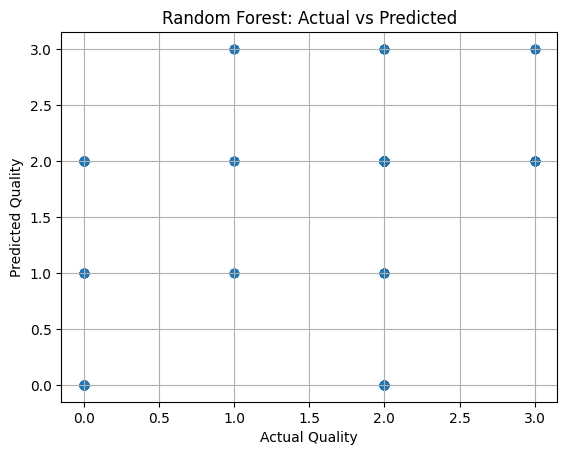

In [294]:
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.grid()
plt.show()

In [295]:
x3 = df_encoded[['buying','maint','safety']]
y3 = df_encoded['class\t']

x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(x3, y3 , test_size=0.2,random_state=42)

model3 = DecisionTreeClassifier()
model3.fit(x_train3,y_train3)

y_pred3 = model3.predict(x_test3)

print("accuracy score: ",accuracy_score(y_test3,y_pred3))
print("confusion matrix:\n ",confusion_matrix(y_test3,y_pred3))


accuracy score:  0.7023121387283237
confusion matrix:
  [[ 40  10  33   0]
 [  0   3   4   4]
 [ 26   7 196   6]
 [  0   0  13   4]]
